In [3]:
# Import Required Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt



In [2]:
## Load and Preprocess the Data
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()




In [3]:
# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255



In [4]:
# Reshape the data to fit the model input
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)









# Convert labels to one-hot encoding converts int to binary matrix
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)








In [5]:

# Build and Compile the Model
model = models.Sequential([   # creates linear stack of layers(1 ip 1 op tensor)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),   #1st convolution layer applies 32 filters to ip image
    #1 here is the color channel
    layers.MaxPooling2D((2, 2)),  #reduces dimensions by half
    layers.Conv2D(64, (3, 3), activation='relu'),     #2nd convolution layer with 64 filters
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  #3nd convolution layer
    layers.Flatten(),   #flattern converts 3d ouput from conv layers into 1 d for fully connected layer
    layers.Dense(64, activation='relu'),   #1st fully connected layer
    layers.Dense(10, activation='softmax')   #2nd fully connected layer last dense layer should be 10 neurons (0-9)
])








C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

model.compile(optimizer='adam',    #adjusts learning rate
              loss='categorical_crossentropy',    #model compilation
              metrics=['accuracy'])  #accuracy is used to evaluate performance






In [7]:
# Train the Model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))  
#no of times model iterates  through entire dataset






Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8619 - loss: 0.4482 - val_accuracy: 0.9814 - val_loss: 0.0577
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9841 - loss: 0.0526 - val_accuracy: 0.9849 - val_loss: 0.0435
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9888 - loss: 0.0364 - val_accuracy: 0.9878 - val_loss: 0.0357
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.9907 - val_loss: 0.0284
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9929 - loss: 0.0217 - val_accuracy: 0.9921 - val_loss: 0.0251


In [5]:
#Save the Model to a file (Optional)
model.save('mnist_digit_model.h5')




NameError: name 'model' is not defined

In [9]:
# Function to Load and Preprocess User Input Image


def load_and_preprocess_image(filepath):
    # Load the image in grayscale
    img = image.load_img(filepath, color_mode="grayscale", target_size=(28, 28))
    img = image.img_to_array(img)
    
    # Normalize the image
    img = img.astype('float32') / 255
    
    # Invert the image (MNIST uses white digits on a black background)
    img = 1 - img
    
    # Expand dimensions to fit the model input
    img = np.expand_dims(img, axis=0)
    
    return img

#makes image suitable for input into trained model

In [94]:
def predict_digit(model):
    # Take user input for the image path
    image_path = r"C:\Users\HP\Downloads\digit3.jpg"
    
    # Preprocess the image
    input_image = load_and_preprocess_image(image_path)
    
    # Predict the digit
    prediction = model.predict(input_image)
    predicted_digit = np.argmax(prediction)
    
    print(f'Predicted digit: {predicted_digit}')
    
    # Display the input image
    img = image.load_img(image_path, color_mode="grayscale")
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit}')
    plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted digit: 3


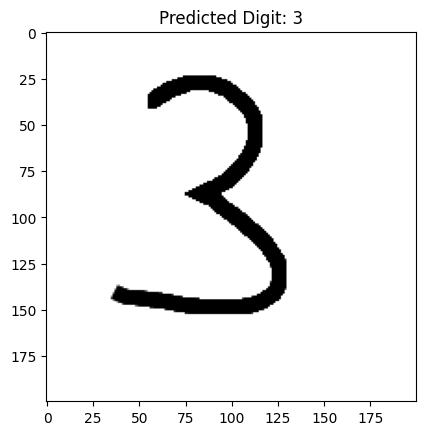

In [95]:
predict_digit(model)
